<img src=https://docs.xarray.dev/en/stable/_static/Xarray_Logo_RGB_Final.svg width=400 />

# Lessons 25-26 : Xarray Basics

This lesson is modified from [Introduction to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) by [Project Pythia](https://projectpythia.org), and [Xarray Fundamentals](
https://earth-env-data-science.github.io/lectures/xarray/xarray.html) by [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html).


[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

---

## Overview

Xarray is a Python library for handling labeled multi-dimensional arrays, commonly used for geospatial data such as climate, oceanographic, and remote sensing data in formats like netCDF. By the end of this lesson, you will be able to:
- explain essential features of Xarray
- load, manipulate, analyze, and visualize data in netCDF format
- leverage Xarray for your water and environmental data science projects

--- 

## Installation and import

In [ ]:
#pip install xarray

In [ ]:
#pip install cartopy

In [ ]:
#pip install netCDF4

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd

import hvplot.xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore') #  Suppress warnings issued by Cartopy when downloading data files

--- 

## 1. Basic Concepts

### 1.1 Label dimensions

Xarray borrows from pandas. Xarray introduces labels in the form of dimensions, coordinates, and attributes on top of raw NumPy-like arrays, which makes working with arrays simple and clear. 

Let us look at a simple example of a 4D array representing sea surface height (zos) data with dimensions:
- latitude,
- longitude,
- depth, 
- time

We can add as many labeled dimensions. We can use Xarray to create a DataArray or DataSet with labeled dimensions and coordinates, and include metadata such as units and a description for better understanding and documentation.

### 1.2 DataArray and DataSet

A Dataset holds many DataArrays which potentially can share coordinates. In analogy to pandas:

    pandas.Series : pandas.Dataframe :: xarray.DataArray : xarray.Dataset
    

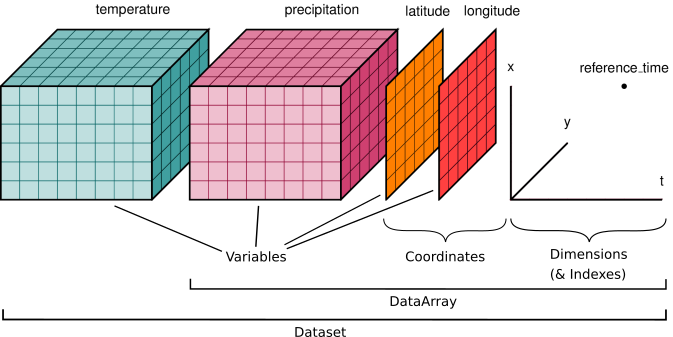

## 2. Creating a DataArray and Dataset

### 2.1 Creating a DataArray

Xarray handles multidimensional and spatiotemporal data using labeled dimensions and coordinates and maintain metadata. Let us look at a simple example of a 4D array representing sea surface height (zos) data with
- latitude,
- longitude,
- depth, 
- date

We will store metadata according to  the [CF Conventions](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#_description_of_the_data).

In [ ]:
# Create coordinates for the four labeled dimensions
dates = pd.date_range('2024-01-03', periods=2)  # Generating a date range for the data
depths = [10, 20, 30]  # List of depth values
latitudes = [24.5, 26.5, 28.5, 30.5]  # latitude values 
longitudes = [-87, -84.5, -83, -81.5, -79]  # longitude values 

# Create a 4D Numpy Array representing sea surface height (zos) values  for a 2x3x4x5 grid
size=(len(dates), len(depths), len(latitudes), len(longitudes))
zos = np.round(np.random.uniform(-1, 1, size= size), 2) #sea surface height [m]

# Create a DataArray with zos values
# with labeled dimensions and coordinates 
da = xr.DataArray(zos,                                    # zos values
                  dims=['date', 'depth', 'lat', 'lon'],   # dimensions
                  coords={                                # coordinates 
                      'date': dates, 
                      'depth': depths,  
                      'lat': latitudes, 
                      'lon': longitudes
                  })  

# Add metadata to the DataArray
da.attrs['Long Name'] = 'sea_surface_height_above_geoid'
da.attrs['Short Name'] = 'zos'
da.attrs['Units'] = 'meters'
da.attrs['Description'] = "Sea surface height is the height of the sea surface above the geoid, \
which is an equipotential surface that approximates mean sea level.\
The sea surface height can be influenced by various factors\
such as ocean currents, tides, winds, and temperature."

# Display DataArray with labeled dimensions and coordinates, and metadata
display(da)

### 2.2 Creating a Dataset with one variable

A Dataset holds many DataArrays which potentially can share coordinates. However, we can also create a Dataset with just one variable. Let use the above data to create a DataSet.

In [ ]:
# Create coordinates for the four labels
dates = pd.date_range('2024-01-01', periods=2)  # Generating a time range for the data
depths = [10, 20, 30]  # List of depth values
latitudes= [24.5, 26.5, 28.5, 30.5]  # latitude values 
longitudes = [-87, -84.5, -83, -81.5, -79]  # longitude values 

# Create a 4D Numpy Array representing values  for a 2x3x4x5 grid
size=(len(dates), len(depths), len(latitudes), len(longitudes))
zos = np.round(np.random.uniform(-1, 1, size= size), 2) #sea surface height [m]

# Create a DataArray with zos values
ds = xr.Dataset(
    {
        'zos': (('date', 'depth', 'lat', 'lon'), zos), #zos values and its dimensions 
    },   
    coords={'date': dates, 'depth': depths, 'lat': latitudes, 'lon': longitudes}) #Coordinates

# Add metadata to the DataArray
ds.zos.attrs['Long Name'] = 'sea_surface_height_above_geoid'
ds.zos.attrs['Short Name'] = 'zos'
ds.zos.attrs['Units'] = 'meters'
ds.zos.attrs['Description'] = "Sea surface height is the height of the sea surface above the geoid, \
which is an equipotential surface that approximates mean sea level.\
The sea surface height can be influenced by various factors\
such as ocean currents, tides, winds, and temperature."

# Displaying DataSet with labeled dimensions and coordinates, and metadata
display(ds)

### 2.3 Creating a Dataset with multiple variables

Let us put together a Dataset with sea surface temperature, and salinty 

In [ ]:
# Create coordinates for the four labels
dates = pd.date_range('2024-01-01', periods=2)  # Generating a time range for the data
depths = [10, 20, 30]  # List of depth values
lat= [24.5, 26.5, 28.5, 30.5]  # latitude values 
lon = [-87, -84.5, -83, -81.5, -79]  # longitude values 

# Create a 4D Numpy Array representing values  for a 2x3x4x5 grid
size=(len(dates), len(depths), len(lat), len(lon))
tos = np.round(np.random.uniform(26, 30, size=size), 2) #sea surface temperature [C]
sos = np.round(np.random.uniform(33, 36, size=size), 2) #sea surface salinty (PSU) 


# Create a DataArray with zos values
ds2 = xr.Dataset(
    {
        'tos': (('date', 'depth', 'lat', 'lon'), tos),   #tos values and its dimensions 
        'sos': (('date', 'depth', 'lat', 'lon'), sos),   #sos values and its dimensions 
    },
    coords={'date': dates, 'depth': depths, 'lat': latitudes, 'lon': longitudes})

# Add metadata to the DataArray
ds2.tos.attrs['Long Name'] = 'sea_surface_temperature'
ds2.tos.attrs['Short Name'] = 'tos'
ds2.tos.attrs['Units'] = 'Degree Celsius'
ds2.sos.attrs['Long Name'] = 'sea_surface_salinty'
ds2.sos.attrs['Short Name'] = 'sos'
ds2.sos.attrs['Units'] = 'Practical salinity units (PSU)'

# Displaying  DataSet with labeled dimensions and coordinates, and metadata
display(ds2)

## 3. Understanding DataArray and DataSet 

#### 2.3.1 Coordinates and indexes

The coordinates are used to create _indexes_, which work similar to a Pandas index.

In [ ]:
# Accessing the index objects associated with the dimensions of the DataArray
ds.indexes

DataArrays have coordinates associated with them. For example, `lat` is one such coordinate variable. We can access `lat` coordinate variable from the DataArray `ds` by using `ds.lat`.

In [ ]:
# Retrieving the values of the `lat` coordinate from the DataArray `ds`.
ds.lat

#### 2.3.2 Cooridnates versus variables

Data variables can be changed using arithmetic operations or other functions, while the coordinates remain unchanged.

In [ ]:
da+1

### 2.3.3 Dataset with aligined coordinates (*advanced*)

Let us assume that we want to add 'longitude' coordinate that aligns with the existing 'latitude' coordinate in the Dataset. This means that the 'longitude' values will be associated with each 'latitude'.
longitudes. This is an array-like object containing the actual longitude values corresponding to each latitude coordinate in the Dataset.
  
Let us add a coordinate variable 'longitude' that will align with the existing 'latitude' coordinate, such that the values provided in the longitudes array will be associated with each latitude value in the Dataset.

In [ ]:
# Create coordinates for the four labels
dates = pd.date_range('2024-01-01', periods=2)  # Generating a time range for the data
latitudes= [24.5, 26.5, 28.5]  # latitude values 
longitudes = [-87, -84.5, -83]  # longitude values 

# Create a 4D Numpy Array representing values  for a 2x3x4x5 grid
size=(len(dates), len(latitudes))
zos = np.round(np.random.uniform(-1, 1, size= size), 2) #sea surface height [m]

# Create a DataArray with zos values
ds_aliginded = xr.Dataset(
    {'zos': (('date', 'latitude'), zos)}, #zos values and its dimensions    
    coords={'date': dates, 'latitude': latitudes}) #Coordinates

# Add metadata to the DataArray
ds_aliginded.zos.attrs['Description'] = "Longitude coordinates align with the latitude coordinates"

# Add a new coordinate variable 'longitude' to the xarray Dataset 'ds'
# The new coordinate will be aligned with the existing 'latitude' coordinate
# The values for the 'longitude' coordinate are provided in the 'longitudes' array
ds_aliginded.coords['longitude'] = ('latitude', longitudes)

# Displaying DataSet with labeled dimensions and coordinates, and metadata
display(ds_aliginded)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
The 'longitude' variable is specified under the 'latitude' coordinate. That is the 'longitude' values are aligned or linked to each specific 'latitude' value. This kind of hierarchical structure is commonly used in geospatial datasets where longitude and latitude are interrelated.
</div>

## 4. Exploring Data

### 4.1 Selecting data (indexing)

When indexing a DataArray or Dataset in xarray using the syntax `ds[:,:, ...]` we are selecting data along dimensions, which is equivealent to using the `isel()` method as shown later.

Let us use indexing `ds.zos[:,:,:,:]` to select 'zos' values for the: 
- first 'date' value,
- third 'depth' level, 
- first three 'lat' values,
- last two 'lon' values

and assign this slice to variable `subset`. Here is how to do it:

In [ ]:
# Select a subset of the 'zos' DataArray from the Dataset 'ds'
# The subset includes the first time step, the third depth level, 
# the first 3 latitude values, and the last 2 longitude values.


subset

You can also retrieve the coordinate values. For example, retieve the lat values for the above selection `ds.zos[].lat`

In [ ]:
# Select the latitude values corresponding to the subset obtained from the 'zos' DataArray in the Dataset 'ds'
# The subset includes the first time step, the third depth level, 
# the first 3 latitude values, and the last 2 longitude values.


subset_lat

### 4.2 Plotting data 

Similar to Pandas, Xarray has built-in plotting for quick visualization.

Let us do a 1d plot zos values along all 'lat' values, for the first 'date' value, first 'depth', and last 'lon' value. First we need to select this data as we did above and the call the `.plot` method similar to Pandas.

In [ ]:
# Plotting the values of the 'zos' DataArray from the Dataset 'ds'
# The plot is for the first time step, the first depth level, 
# all latitude values, and the last longitude value.
# Each data point is marked with a red circle marker ('o').


Let us do a 2d plot of zos values along 'lat' and 'lon' values for the third 'depth' level of the second 'date' value.

In [ ]:
# Plotting a 2D plot from the 'zos' DataArray in the Dataset 'ds'



### 4.3 Integer-based indexing with isel

The `.sel()` and `.isel()` methods are powerful for data selection.  The `.sel()` method is used for selection based on labels, while the `.isel()` method is used for selection based on integer positions within the dimensions of the data array. For example, `ds.zos.isel(time=0, lat=slice(0,3))` selects the first time step and the first three latitude values from DataArray `ds.zos`.  
  
Let us select the: 
- first 'date' value,
- first 'depth' level,
- second to fourth 'lat' values

using `.isel()` method. 

In [ ]:
# Selects zos data at depth index 1, date index 0, and latitude indices from 1 to 3
# from the xarray dataset `ds` using the intger-based selection method


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    Slicing along coordinates can be done using the <code>slice</code> method with labels in <code>sel</code> and with integers in <code>isel</code>.
</div>

### 4.4 Label-based indexing with sel

Now let us select a given index values using `.sel(key1='text_value', key2=num_value, method='nearest')` method to show why this method is so powerful. 
  
Let us select '2024-01-01' and 'lat' value 28. We have a problem since our lat coordinats has only '26.5' and '28.5', so our label '28' does not exist. This is not a problem because `.sel()` has the `method` parameter to perform selection methods as follows.

| Method   | Description                                    |
|----------|------------------------------------------------|
| nearest  | Selects the nearest valid values to the specified coordinates |
| ffill    | Carries the last valid value forward to fill gaps |
| bfill    | Carries the next valid value backward to fill gaps |

You can use these methods in the `.sel()` function based on your analysis need.

In [ ]:
# label-based selection to extract 'zos' data from the 'ds' DataSet.
# Select data for the date '2024-01-01', 
# and latitude equal to 28 using the 'nearest' selection method for interpolation.

ds.zos.sel(
    date='2024-01-01',   # Selecting data for the specified date
    lat=28, method='nearest',  # Selecting latitude nearest to 28 
)

 When using `isel` for integer-based indexing and `sel` for label-based indexing, we can also:
 - Use the `slice` method for selecting a range of values
 - Perform approximate selection with methods like `nearest`

Let us see an example of creating a subset based on specific latitude and longitude ranges. This is particularly handy when working with global datasets and you need to extract a regional subset.

In [ ]:
print("Latitude values of original data")
display(ds.lat.values)

print("Longitude values of original data")
display(ds.lon.values)

sliced_ds= ds.zos.sel(
    date='2024-01-01',   # Selecting data for the specified date
    depth=10,             # Seecting data for the specified depth
    lat=slice(26,30),  lon=slice(-84, -81) #Selecting a slice from lat and lon 
)
print("Latitude values of sliced data")
display(sliced_ds.lat.values)

print("Longitude values of sliced data")
display(sliced_ds.lon.values)

sliced_ds.plot();

### 4.6 Data selection with loc attribute (*Optional*)

When extracting data from a DataArray, besides utilizing the `.sel()` method, we have the option to employ the `.loc` attribute. Every DataArray includes a `.loc` attribute, which allows us to choose data by specifying a coordinate value within square brackets similar to NumPy and Pandas. When using the `.loc` attribute, we can specify data slices using a syntax `:`, similar to NumPy and Pandas, or we can use slice function. Both of these slicing techniques are illustrated above.

Let use use `.loc` to select all 'date' values, 'depth' from 20 to 30, 'lat' of 24.5, and 'lon' from -87 to -83.

In [ ]:
# Selecting data based on Date, depth, latitude, and longitude
ds.zos.loc[:, 20:30, 24.5, slice(-87, -81.5)]  

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
When using <code>.loc</code>, we can specify the values for each coordinate; however, we cannot specify the dimension names. Thus, we need to provide the dimensions in the correct sequence, and this sequence must be predetermined. Also, similar to Pandas, <code>.loc</code> is inclusive while integer-based indexing <code>da[:,;]</code>` or <code>isel</code> is execlusive.
</div>

## 5. Computation

Various mathematical and statistical computations can be applied to analyze and manipulate DataArrays or DataSets with tasks such as data transformation, data aggregation, and data interpolation. Here are examples of few computation operations that can be done on the DataArrays and DataSets.

### 5.1 Data transformation 

DataArrays and DataSets work seamlessly with arithmetic operators and numpy array functions. Here is an example:

In [ ]:
tos_new = ds2.tos + 273.15
tos_new[0,0,0,:].plot()

Let use do one more example. Let us change the longitude convention **180°** with Eastern longitudes  from 0° to 180° and Western longitudes from 0° to -180°,  to the longitude convention **360°** from 0° to 360°.

In [ ]:
ds3= ds2.copy()
ds3['lon'] = ds3['lon']+360
ds3

We can also combine multiple xarray datasets in arithemtic operations

In [ ]:
g = 9.8
buoyancy = g * (2e-4 * ds2.tos - 7e-4 * ds2.sos)
buoyancy[0,0].plot(yincrease=False)

### 5.2 Data aggregation 

#### 5.2.1 Data aggregation methods

These are examples of commonly used aggregation methods in Xarray

| Aggregation              | Description                                         |
|--------------------------|-----------------------------------------------------|
| ``count()``              | Total number of items                               |
| ``mean()``, ``median()`` | Mean and median                                     |
| ``min()``, ``max()``     | Minimum and maximum                                 |
| ``std()``, ``var()``     | Standard deviation and variance                     |
| ``prod()``               | Compute product of elements                         |
| ``sum()``                | Compute sum of elements                             |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value             |
| ``cumsum()``             | Compute the cumulative sum of elements              |
| ``cumprod()``            | Compute the cumulative product of elements          |
| ``cummin()``, ``cummax()``| Compute the cumulative minimum and maximum values   |
| ``diff()``               | Compute the difference of elements along a dimension|
| ``quantile()``           | Compute the quantile of elements                    |
| ``mad()``                | Compute the mean absolute deviation from the mean   |


Let us, for example, find the mean zos along all depth values

In [ ]:
# Calculate the mean of the variable 'zos' along the 'depth' dimension in the DataSet 'ds'
ds.zos.mean(dim=('depth'))


For example, let us find the mean zoz for the whole area at each date and depth value

In [ ]:
# Calculate the mean of the variable 'zos' along the 'lat' and 'lon' dimensions in the DataSet 'ds'


We can calculate the max 'zos' values for each depth

#### 5.2.2 Resample

When we receive data in daily or monthly intervals and need to summarize it into monthly or yearly aggregates, we can utilize the `.resample` function similar to what we did in Pandas.

Here is an example. Where we will combine `.mean` and `.resample`.

In [ ]:
# Create coordinates for the four labels
dates = pd.date_range('2024-01-01', periods=240, freq='M')  # Generating a time range for the data with monthly frequency
latitudes= [24.5, 26.5, 28.5, 30.5]  # latitude values 

# Create a 2D Numpy Array representing 
size=(len(dates), len(latitudes))
zos = np.round(np.random.uniform(-1, 1, size= size), 2) #sea surface height [m]

# Create a DataArray with zos values
ds_monthly = xr.Dataset({'zos': (('date', 'lat',), zos)}, coords={'date': dates, 'lat': latitudes})

# Add metadata to the DataArray
ds_monthly.zos.attrs['Description'] = "Monthly zos data from 2024 to 2064"

# Displaying 
display(ds_monthly)

# Find mean across lat values and plot
ds_monthly.zos.mean(dim=('lat')).plot()


# Create a new DataSet 'ds_annually' as a copy of the original DataSet 'ds'
ds_annually=ds_monthly.copy()

# Resample the 'pr' variable to calculate annual averages
ds_annually = ds_monthly.resample(date='Y').mean(dim='date')

display(ds_annually)

# Find mean across lat values and plot
ds_annually.zos.mean(dim=('lat')).plot()

### 5.3 Data interpolation and extrapolation

In [Section 4.4 Label-based indexing](#4.4-Label-based-indexing-with-sel), we explored using the `nearest` method to select a value close to a specified coordinate that may not be present in our DataArray. Alternatively, we can interpolate this value using methods like `interp`.

We can an interpolate or extrapolate values along dimensions using functions like `interp` or `reindex`. We can use `interp`to interpolate data along a specified dimension using linear interpolation, cubic interpolation, or other methods.

| Method   | Description                                    |
|----------|------------------------------------------------|
| linear   | Performs linear interpolation to estimate values at the specified coordinates |
| cubic    | Performs cubic interpolation to estimate values at the specified coordinates |
| nearest     | Performs quadratic interpolation to estimate values at the specified coordinates |

We can use `reindex` to change the index of the data along one or more dimensions, potentially adding or removing indices. Typically, `interp` is used when we want to interpolate data values along a specific dimension to fill in  values or create a smoother representation of the data. The `reindex` is more commonly used when we want to align the indices of multiple DataArrays or Datasets, potentially filling missing values with NaNs or other fill values.

For example, we can interpolate 'zos' values at: 
- 'lat' of 27,
- 'lon' of -84,
- 'date' of 2024-01-01,
- 'depth' of 10

and return the results as a NumPy array instead of a DataArray. Our data already contains 'date' of 2024-01-01, 'depth' of 10 so we need to interpolate for 'lat' and 'lon' values  

In [ ]:
# Interpolate 'zos' data in the 'ds' DataSet for latitude 27 and longitude -84 using .interp
# then select data for depth of 30 meters using .sel
# Return results as a NumPy array instead of a DataArray 


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    The attribute <code>.values</code> extracts the values of the resulting DataArray as a NumPy array.
</div>

Now let use combine everything together that is:
- `.sel` for label-based indexing, 
- `slice` to create a subset based on specific 'lat' and 'lat' ranges
- `linear` to interpolate for a depth value of 11

and plot our new slice. Note the zos values in this slice is different than the previous slice in
[Section 4.4 Label-based indexing](#4.4-Label-based-indexing-with-sel), because it is at a slightly different depth.

In [ ]:
ds.zos.sel(date='2024-01-01',     #Select a date
           lat=slice(26,30),      #Select a lat slice
           lon=slice(-84, -81)    #Select a long slice
          ).interp(depth=11, method ='linear'  #Interpolate at depth 11
                  ).plot()

These are just a few examples of the operations we can perform. The xarray library provides a wide range of functionalities for working with labeled multi-dimensional data like this.

## 6. Combing Data

There are various methods to combine arrays. Here are a few:
- `xr.concat`: Concatenates arrays along specified dimensions, creating a larger array with shared dimensions (e.g., combining two zos arrays with different date values).
- `xr.merge`: Combines distinct arrays (e.g., zos and tos) into one dataset by aligning them based on their coordinates, accommodating varying dimensions or coordinates.
- `xr.combine_nested`: Merges arrays into a dataset while preserving their nested structure, simplifying handling of hierarchical data layouts.

You can learn these functions and similar ones as needed. Here are a few examples to illustrate them.

### 6.1 Combing data with concat 

We can use `xr.concat` function to combine data along a common dimension.

For example, 
- the `da` DataArray has 'zos' data for '2024-01-03' and '2024-01-04' along the 'date' dimension,
- the `ds` DataSet has  'zos' data for '2024-01-01' and '2024-01-02' along the 'date' dimension.

Let use combine this data to have an extended DataArray from '2024-01-01' and '2024-01-04' using `xr.concat` function. After we combine the data we will use `.sortby()` method to sort the dates in ascending order. 

In [ ]:
# Concatenate 'da' and 'ds.zos' along the 'date' dimension, then sort the result by 'date'
ds_date_extended=xr.concat([ds.zos, da], dim='date').sortby('date')

ds_date_extended

In [ ]:
# Calculating and plotting the zos mean along the 'lat', 'lon', and depth dimensions
ds_date_extended.mean(dim=['lat', 'lon','depth']).plot(marker='o');


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
   Xarray will not check the values of the coordinates before <code>concat</code>. It will just stick everything together into a new array. This can result overlapping data.
</div>

### 6.2 Combining data with merge

We can merge both DataArrays and Datasets. If the data are not aligned, they will be aligned before merge.

For example, let us combine 
- 'zos' data from the `ds_date_extended` DataSet that has four date values
- with the 'tos' and 'sos' data from the `ds2` DataSet that has two date values.

This will result in a DataSet with 'zos', 'tos', and 'sos' data. 

In [ ]:
# Merging two datasets, ds_date_extended and ds2, using xr.merge
ds3=xr.merge([ds_date_extended, ds2])

ds3

NaN will be assigned to any missing values in the resulting dataset (i.e., 'tos' and 'sos' with no corresponding 'zos' values). We can plot mean values `ds3.sos` across time to check this.

In [ ]:
#Calculate the mean of 'sos' data along the dimensions 'lat', 'lon', and 'depth' 
# in the dataset ds3, and plots the result
ds3.sos.mean(dim=['lat', 'lon','depth']).plot(marker='o');

We can alo specify the join options in `merge`. For example, we can select a slice before we apply the `merge` function.

In [ ]:
# After selecting data for dates '2024-01-01' and '2024-01-02' 
# and depths in the range of 10 to 30 from each dataset,
# merge two xarray datasets, ds_date_extended and ds2, 

xr.merge([
    ds_date_extended.sel(depth=slice(10, 30), date=['2024-01-01', '2024-01-02']),  #Select this slice of data
    ds2.sel(depth=slice(10, 30), date=['2024-01-01', '2024-01-02'])  #Select this slice of data
])

## 7. Broadcasting (*advanced*)
Broadcasting in xarray allows for operations between arrays with different shapes by automatically aligning dimensions. This feature simplifies the handling of data with varying dimensions, enabling seamless computation and manipulation across multiple arrays without the need for manual alignment or iteration.

This topic is beyond the scope of this lesson. If you are curious, I added a broadcasting example in Exerecise 9. 

## 8. Write and read data to a netCDF file

NetCDF is a file format widely used in scientific and engineering fields to store multidimensional data efficiently. Let us explore how to write our DataArray to a netCDF file for data preservation and learn to read data from existing netCDF files for analysis.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
<strong>NetCDF</strong>, which stands for <strong>Network Common Data Form</strong>, is a set of software libraries and data formats for array-oriented scientific data. NetCDF is commonly used in the geoscience, climate, and meteorology fields, among others, to store and distribute gridded data. NetCDF data is stored in a self-describing format, meaning that it includes metadata along with the actual data, making it easier for users to understand the data. 
</div>

### 8.1 Write to a NetCDF file using `.to_netcdf`

The `.to_netcdf` method is useful for exporting data structures in xarray to NetCDF file format.

In [ ]:
# Write the DataArray to a netCDF file
ds.to_netcdf('Data/ds/zos.nc')
ds2.to_netcdf('Data/ds/tos_sos.nc')

### 8.2 Read a NetCDF file using `xr.open_dataset`

The `xr.open_dataset` method is used to open a single NetCDF file as an xarray Dataset.
It is suitable for working with a single dataset stored in a single file. It returns an xarray Dataset object.

In [ ]:
# Read the netCDF file back into a Dataset
ds = xr.open_dataset('Data/ds/zos.nc')

# Displaying the temperature_data DataArray with labeled dimensions, coordinates, and metadata
display(ds)

# Close the file after reading the data
ds.close()

### 8.3 Read multiple netCDF files using `xr.open_mfdataset`

The `xr.open_mfdataset` is used to open multiple NetCDF files as a single xarray Dataset.
It is useful when you have a dataset spread across multiple files (e.g., one file per time step) and you want to combine them into a single logical dataset. It returns an xarray Dataset object that combines the data from all the input files.

In [ ]:
# Use xr.open_mfdataset with the file paths of the two datasets
ds_combined = xr.open_mfdataset("Data/ds/*.nc", combine="by_coords")

# Displaying the temperature_data DataArray with labeled dimensions, coordinates, and metadata
display(ds_combined)

# Close the file after reading the data
ds_combined.close()

## Summary

Xarray extends Pandas' labeled-data features for N-dimensional data, making it popular for analyzing gridded datasets. It enables easy access to metadata in NetCDF files, simplifying code writing and readability.

### What's next?
If you want to use Xarray you can learn about these topics:
- Remote data access with OPeNDAP, which facilitates accessing data stored remotely on servers. It allows for efficient retrieval of specific subsets of data without downloading the entire dataset, making it ideal for working with large datasets.
- Advanced visualization with Cartopy, which we will learn next.

## Resources and references

- Most basic questions and issues with Xarray can be resolved with help from the material in the [Xarray documentation](http://xarray.pydata.org/en/stable/). Some of the most popular sections include [Why Xarray](http://xarray.pydata.org/en/stable/getting-started-guide/why-xarray.html),  [Quick overview](http://xarray.pydata.org/en/stable/getting-started-guide/quick-overview.html#), and [Example gallery](http://xarray.pydata.org/en/stable/gallery.html)
- Another resource you may find useful is this [Xarray Tutorial collection](https://xarray-contrib.github.io/xarray-tutorial/), created from content hosted on GitHub.
- Nasa [Gesdisc-Tutorials](https://github.com/nasa/gesdisc-tutorials) contain a lot of examples and case studies
- Python Tutorial Seminar Series - [Xarray Part 1](https://youtu.be/Ss4ryKukhi4) and [Xarray Part 2](https://youtu.be/2H_4drBwORY) provide recordings introducing the Python Package `xarray`.

- Project Pythia [Notebooks on Xarray](https://foundations.projectpythia.org/core/xarray.html) contains tutorials on using Xarray.


